<a href="https://colab.research.google.com/github/Prabin1025y/NN-from-scratch/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
df_train = pd.read_csv("/content/mnist_train.csv")
df_test = pd.read_csv("/content/mnist_test.csv")
df_train.shape

(60000, 785)

In [26]:
rows, cols = df_train.shape
data_train = np.array(df_train) #convert dataframe to numpy array

In [27]:
data = data_train.T #transpose it
data

array([[5, 0, 4, ..., 5, 6, 8],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
X_train = data[1:cols]
X_train = X_train/255 #normalize the intensity values
Y_train = data[0]

In [29]:
def ReLU(x):
  return np.maximum(0, x)


In [30]:
def soft_max(x):
  e_stable = np.exp(x - np.max(x, axis=0, keepdims=True)) #make the value stable so that is doesnt become exponentially large
  return e_stable / sum(e_stable)

In [31]:
def one_hot_encode(x, number_of_classes = 10):
  encoded_x = np.zeros((len(x), number_of_classes))
  for index, label in enumerate(x):
    encoded_x[index][label] = 1
  return encoded_x.T


In [32]:
def derive_ReLU(x):
  return x > 0

In [33]:

def init_params(X):
  a0 = X
  w1 = np.random.rand(10,784) - 0.5 #initialize random weight for firs connections
  b1 = np.random.rand(10,1) - 0.5 #initialize random bias for first connections
  w2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return a0, w1, b1, w2, b2

#forward propagation start to predict the outcome using weights and bias
def forward_prop(a0, w1, b1, w2, b2):
  z1 = w1.dot(a0) + b1
  a1 = ReLU(z1)

  z2 = w2.dot(a1) + b2
  a2 = soft_max(z2)
  return a1, z1, a2, z2

#backward propagation to determine error and values to be changed
def backward_prop(a0, a1, a2, z1, z2, w2, y_train):
  m = a0.shape[1]
  y_encoded = one_hot_encode(y_train)

  dz2 = a2 - y_encoded
  dw2 = (1/m) * dz2.dot(a1.T)
  db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)

  dz1 = w2.T.dot(dz2) * derive_ReLU(z1)
  dw1 = (1/m) * dz1.dot(a0.T)
  db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

  return dw1, db1, dw2, db2

#optimize parameters using gradient descent
def optimize_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr):
  w1 = w1 - lr * dw1
  b1 = b1 - lr * db1
  w2 = w2 - lr * dw2
  b2 = b2 - lr * db2
  return w1, b1, w2, b2


In [34]:
def get_acc(a2, y):
  return np.sum(np.argmax(a2,0) == y)/ y.size

In [35]:
def gradient_descent(a0, w1, b1, w2, b2,Y,iterations, lr):

  for i in range(iterations):
    a1, z1, a2, z2 = forward_prop(a0, w1, b1, w2, b2)
    dw1, db1, dw2, db2 = backward_prop(a0,a1,a2,z1,z2,w2,Y)
    w1, b1, w2, b2 = optimize_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)

    if i%60 == 0:
      print("Iteration: ", i)
      print("Accuracy:", get_acc(a2, Y))
  return w1, b1, w2, b2

In [36]:
a0, w1, b1, w2, b2 = init_params(X_train)

In [37]:
w1, b1, w2, b2 = gradient_descent(a0, w1, b1, w2, b2, Y_train, 500, 0.1)

Iteration:  0
Accuracy: 0.1266
Iteration:  60
Accuracy: 0.35151666666666664
Iteration:  120
Accuracy: 0.5538
Iteration:  180
Accuracy: 0.6692333333333333
Iteration:  240
Accuracy: 0.7258333333333333
Iteration:  300
Accuracy: 0.7586
Iteration:  360
Accuracy: 0.7860666666666667
Iteration:  420
Accuracy: 0.8076
Iteration:  480
Accuracy: 0.8223833333333334


In [41]:
def make_prediction(X, w1, b1, w2, b2):
  ___, __, _, a2 = forward_prop(X, w1, b1, w2, b2)
  prediction = np.argmax(a2, 0)
  return prediction

def test_prediction(X,Y, index, w1, b1, w2, b2):
  current_image = X[:, index, None]
  prediction = make_prediction(current_image, w1, b1, w2, b2)
  label = Y[index]

  print("prediction: ", prediction)
  print("label: ", label)

  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation="nearest")
  plt.show()


In [42]:
n, m = df_test.shape
data_test = np.array(df_test)
data_test = data_test.T
Y_test = data_test[0]
X_test = data_test[1:m]

index:  5078
prediction:  [3]
label:  3


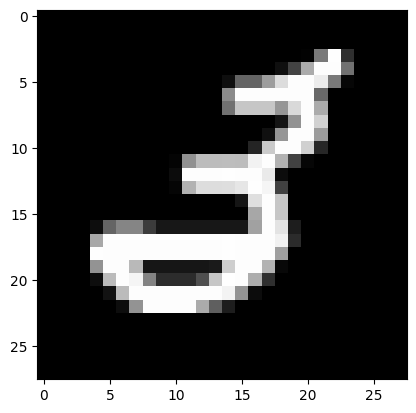

index:  7291
prediction:  [2]
label:  2


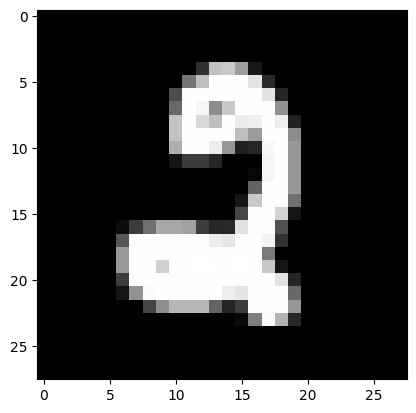

index:  6927
prediction:  [0]
label:  0


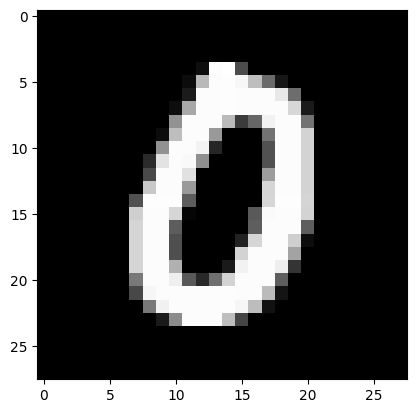

index:  6306
prediction:  [7]
label:  7


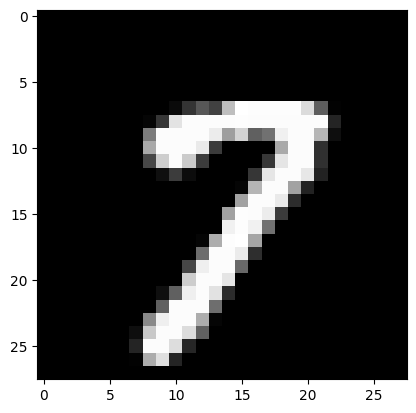

index:  5032
prediction:  [4]
label:  4


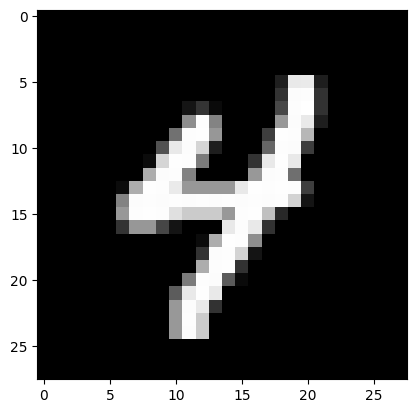

index:  3781
prediction:  [8]
label:  8


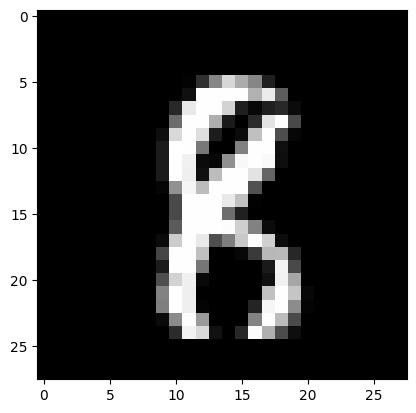

index:  1695
prediction:  [7]
label:  9


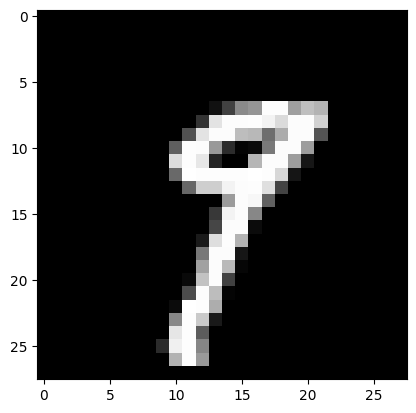

index:  1551
prediction:  [2]
label:  2


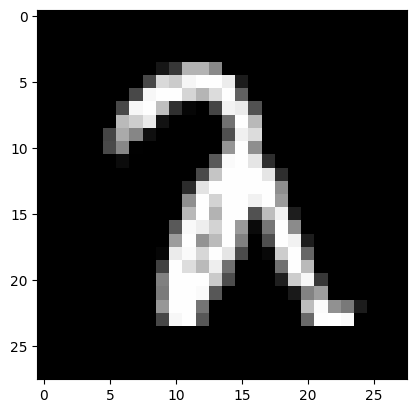

index:  4812
prediction:  [2]
label:  2


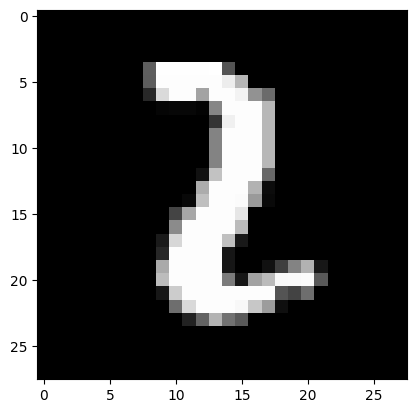

index:  2061
prediction:  [0]
label:  0


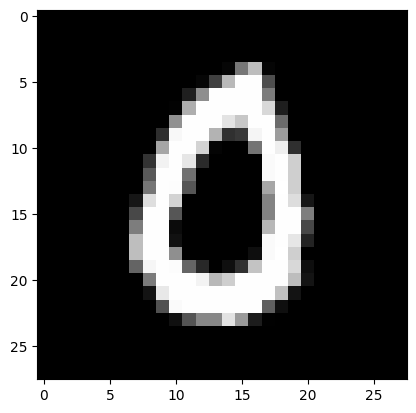

In [43]:
for i in range(10):
  index = np.random.randint(0, 10000)
  print("index: ", index)
  test_prediction(X_test, Y_test, index, w1, b1, w2, b2)